# Machine Learning - aprendizaje supervisado

Usamos datos del Lending Club para desarrollar nuestra comprensión de los conceptos de aprendizaje automático. The Lending Club es una compañía de préstamos peer-to-peer. Ofrece préstamos que son financiados por otras personas. En este sentido, el Lending Club actúa como un centro que conecta a los prestatarios con los inversores. El cliente solicita un préstamo de cierta cantidad y la empresa evalúa el riesgo de la operación. Si la solicitud es aceptada, puede o no estar completamente cubierta. Nos centraremos en la predicción de si el préstamo será financiado en su totalidad, en función de la calificación y la información relacionada con la aplicación. Los datos provienen de la siguiente URL:

https://www.lendingclub.com/info/download-data.action

Limpiaremos y reprocesaremos el conjunto de datos parcial de 2007-2011. Al enunciar el problema un poco más, de acuerdo con la información suministrada por el cliente que solicita un préstamo, queremos predecir si un préstamo aceptado se financiará por completo o no.


<div style="text-align: right"> <sub>Referencia: Igual L. & Seguí, S. (2017). *Introduction to Data Science*. Springer. Código fuente: https://github.com/DataScienceUB/introduction-datascience-python-book </sub> </div>

In [1]:
import matplotlib.pylab as plt

%matplotlib inline 
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex=True)
plt.rc('font', family='times')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

In [2]:
import pickle
ofname = open('dataset_small.pkl','rb') 
(x,y) = pickle.load(ofname, encoding='latin1')

y revisemos las dimensiones

In [3]:
dims = x.shape[1]
N = x.shape[0]
print('dims: ' + str(dims) + ', samples: ' + str(N))

dims: 15, samples: 4140


In [4]:
from sklearn import neighbors
from sklearn import datasets
# Create an instance of K-nearest neighbor classifier
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
# Train the classifier
knn.fit(x, y)
# Compute the prediction according to the model
yhat = knn.predict(x)
print('Predicted value: ' + str(yhat[-1]), ', real target: ' + str(y[-1]))

Predicted value: -1.0 , real target: -1.0


Y revisar su exactitud

In [5]:
knn.score(x, y)

0.8487922705314009

La distribución de las etiquetas para predecir se muestra en el siguiente gráfico de torta.

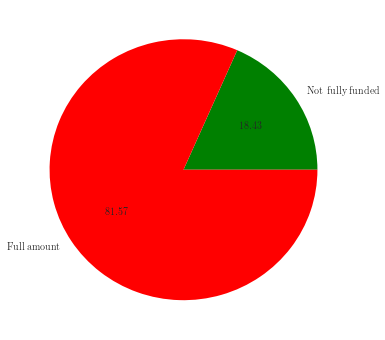

In [6]:
#%matplotlib inline
#import matplotlib.pyplot as plt
import numpy as np
plt.pie(np.c_[np.sum(np.where(y==1,1,0)),np.sum(np.where(y==-1,1,0))][0],
        labels=['Not fully funded','Full amount'],
        colors=['g','r'],
        shadow=False,
        autopct ='%.2f' )
plt.gcf().set_size_inches((6,6))
plt.savefig("pie.png",dpi=300, bbox_inches='tight')


Y calculemos los valores de los elementos de la matriz de confusión

In [7]:
yhat = knn.predict(x)
TP = np.sum(np.logical_and(yhat==-1,y==-1))
TN = np.sum(np.logical_and(yhat==1,y==1))
FP = np.sum(np.logical_and(yhat==-1,y==1))
FN = np.sum(np.logical_and(yhat==1,y==-1))
print( 'TP: '+ str(TP), ', FP: '+ str(FP))
print( 'FN: '+ str(FN), ', TN: '+ str(TN))

TP: 3323 , FP: 572
FN: 54 , TN: 191


In [8]:
from sklearn import metrics
metrics.confusion_matrix(yhat,y)

array([[3323,  572],
       [  54,  191]], dtype=int64)

In [9]:
#Train a classifier using .fit()
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(x,y)
yhat=knn.predict(x)

print("classification accuracy:", metrics.accuracy_score(yhat, y))
print("confusion matrix: \n" + str(metrics.confusion_matrix(yhat, y)))

classification accuracy: 1.0
confusion matrix: 
[[3377    0]
 [   0  763]]


Hasta este momento, utilizamos datos de entrenamiento para "evaluar" el rendimiento del método, como veremos más adelante, esta es una mala práctica. Simulemos la etapa de explotación al mantener un subconjunto de los datos de entrenamiento y evaluar el rendimiento en ese conjunto.

In [10]:
# Simulate a real case: Randomize and split data in two subsets PRC*100% for training and 
# the rest (1-PRC)*100% for testing
import numpy as np
perm = np.random.permutation(y.size)
PRC = 0.7
split_point = int(np.ceil(y.shape[0]*PRC))

X_train = x[perm[:split_point].ravel(),:]
y_train = y[perm[:split_point].ravel()]

X_test = x[perm[split_point:].ravel(),:]
y_test = y[perm[split_point:].ravel()]

print('Training shape: ' + str(X_train.shape), ' , training targets shape: '+str(y_train.shape))
print('Testing shape: ' + str(X_test.shape), ' , testing targets shape: '+str(y_test.shape))

Training shape: (2898, 15)  , training targets shape: (2898,)
Testing shape: (1242, 15)  , testing targets shape: (1242,)


In [11]:
#Train a classifier on training data
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

#Check on the training set and visualize performance
yhat=knn.predict(X_train)

from sklearn import metrics
print("\nTRAINING STATS:")
print("classification accuracy:", metrics.accuracy_score(yhat, y_train))
print("confusion matrix: \n"+ str(metrics.confusion_matrix(y_train, yhat)))


TRAINING STATS:
classification accuracy: 1.0
confusion matrix: 
[[2380    0]
 [   0  518]]


In [12]:
#Check on the test set
yhat=knn.predict(X_test)
print("TESTING STATS:")
print("classification accuracy:", metrics.accuracy_score(yhat, y_test))
print("confusion matrix: \n"+ str(metrics.confusion_matrix(yhat,y_test)))

TESTING STATS:
classification accuracy: 0.7351046698872786
confusion matrix: 
[[831 163]
 [166  82]]


Podemos automatizar este proceso con las herramientas proporcionadas en sklearn.

In [ ]:
#The splitting can be done using the tools provided by sklearn:
from sklearn.cross_validation import train_test_split
from sklearn import neighbors
from sklearn import metrics

PRC = 0.3
acc = np.zeros((10,))
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=PRC)
    knn = neighbors.KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train,y_train)
    yhat = knn.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat, y_test)
acc.shape=(1,10)
print("Mean expected error: "+str(np.mean(acc[0])))

Podemos usar el proceso de validación para la selección del modelo.

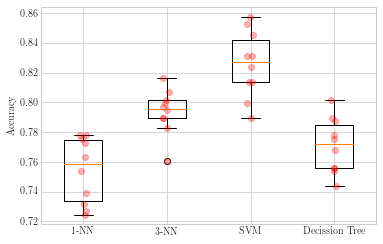

In [14]:
#The splitting can be done using the tools provided by sklearn:
from sklearn.cross_validation import train_test_split
from sklearn import neighbors
from sklearn import tree
from sklearn import svm
from sklearn import metrics

PRC = 0.1
acc_r=np.zeros((10,4))
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=PRC)
    nn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
    svc = svm.SVC()
    dt = tree.DecisionTreeClassifier()
    
    nn1.fit(X_train,y_train)
    nn3.fit(X_train,y_train)
    svc.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    
    yhat_nn1=nn1.predict(X_test)
    yhat_nn3=nn3.predict(X_test)
    yhat_svc=svc.predict(X_test)
    yhat_dt=dt.predict(X_test)
    
    acc_r[i][0] = metrics.accuracy_score(yhat_nn1, y_test)
    acc_r[i][1] = metrics.accuracy_score(yhat_nn3, y_test)
    acc_r[i][2] = metrics.accuracy_score(yhat_svc, y_test)
    acc_r[i][3] = metrics.accuracy_score(yhat_dt, y_test)


plt.boxplot(acc_r);
for i in range(4):
    xderiv = (i+1)*np.ones(acc_r[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc_r[:,i],'ro',alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['1-NN','3-NN','SVM','Decission Tree'])
plt.ylabel('Accuracy')
plt.savefig("error_ms_1.png",dpi=300, bbox_inches='tight')

## Curvas de aprendizaje

Intentemos comprender el comportamiento de los algoritmos de aprendizaje automático cuando cambia la cantidad de datos y la "complejidad" del método. Comencemos primero variando la cantidad de datos para una complejidad fija.

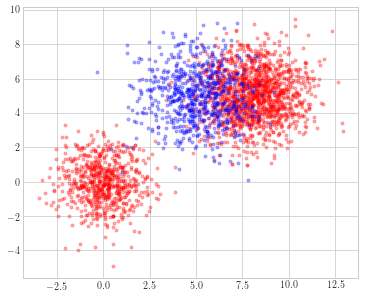

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
MAXN=700

fig = plt.figure()
fig.set_size_inches(6,5)

plt.plot(1.25*np.random.randn(MAXN,1),1.25*np.random.randn(MAXN,1),'r.',alpha = 0.3)
#fig.hold('on')
plt.plot(8+1.5*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2),'r.', alpha = 0.3)
plt.plot(5+1.5*np.random.randn(MAXN,1),5+1.5*np.random.randn(MAXN,1),'b.',alpha = 0.3)
plt.savefig("toy_problem.png",dpi=300, bbox_inches='tight')


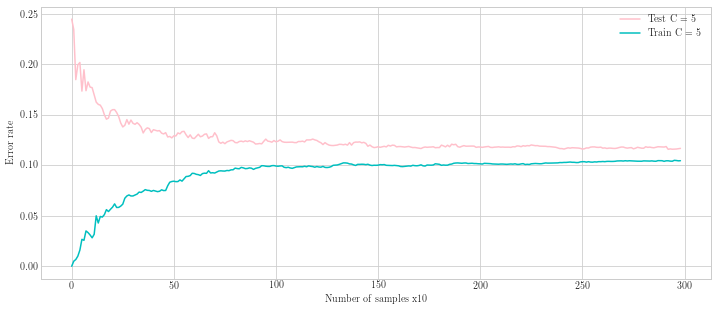

In [16]:
import numpy as np
from sklearn import metrics
from sklearn import tree

C=5
MAXN=1000

yhat_test=np.zeros((10,299,2))
yhat_train=np.zeros((10,299,2))
#Repeat ten times to get smooth curves
for i in range(10):
    X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
    y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y = np.concatenate([y,np.ones((MAXN,1))])
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    X_test = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X_test = np.concatenate([X_test,[8,5]+1.5*np.random.randn(MAXN,2)])
    y_test = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y_test = np.concatenate([y_test,np.ones((MAXN,1))])
    j=0
    for N in range(10,3000,10):
        Xr=X[:N,:]
        yr=y[:N]
        #Evaluate the model
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(Xr,yr.ravel())
        yhat_test[i,j,0] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test.ravel())
        yhat_train[i,j,0] = 1. - metrics.accuracy_score(clf.predict(Xr), yr.ravel())
        j=j+1

p1,=plt.plot(np.mean(yhat_test[:,:,0].T,axis=1),'pink')
p2,=plt.plot(np.mean(yhat_train[:,:,0].T,axis=1),'c')
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.xlabel('Number of samples x10')
plt.ylabel('Error rate')
plt.legend([p1,p2],["Test C = 5","Train C = 5"])
plt.savefig("learning_curve_1.png",dpi=300, bbox_inches='tight')

Repitamos el proceso con un modelo más sencillo

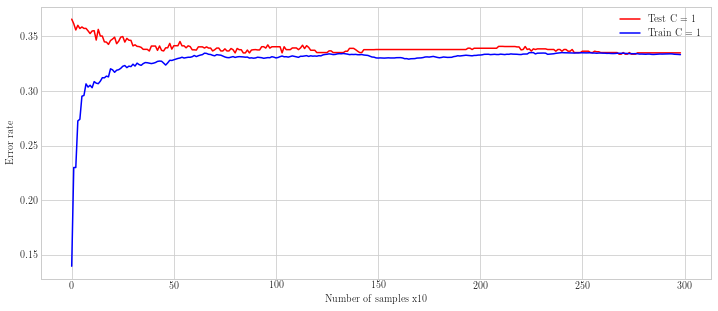

In [17]:
C=1
MAXN=1000

#Repeat ten times to get smooth curves
for i in range(10):
    X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
    y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y = np.concatenate([y,np.ones((MAXN,1))])
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    X_test = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X_test = np.concatenate([X_test,[8,5]+1.5*np.random.randn(MAXN,2)])
    y_test = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y_test = np.concatenate([y_test,np.ones((MAXN,1))])
    j=0
    for N in range(10,3000,10):
        Xr=X[:N,:]
        yr=y[:N]
        #Evaluate the model
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(Xr,yr.ravel())
        yhat_test[i,j,1] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test.ravel())
        yhat_train[i,j,1] = 1. - metrics.accuracy_score(clf.predict(Xr), yr.ravel())
        j=j+1

p3,=plt.plot(np.mean(yhat_test[:,:,1].T,axis=1),'r')
p4,=plt.plot(np.mean(yhat_train[:,:,1].T,axis=1),'b')
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.xlabel('Number of samples x10')
plt.ylabel('Error rate')
plt.legend([p3,p4],["Test C = 1","Train C = 1"])
plt.savefig("learning_curve_2.png",dpi=300, bbox_inches='tight')

y juntemos los resultados para ver las diferencias

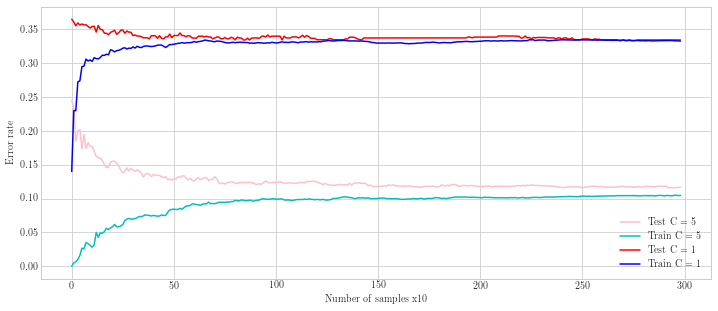

In [18]:
p1,=plt.plot(np.mean(yhat_test[:,:,0].T,axis=1),color='pink')
p2,=plt.plot(np.mean(yhat_train[:,:,0].T,axis=1),'c')
p3,=plt.plot(np.mean(yhat_test[:,:,1].T,axis=1),'r')
p4,=plt.plot(np.mean(yhat_train[:,:,1].T,axis=1),'b')
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.xlabel('Number of samples x10')
plt.ylabel('Error rate')
plt.legend([p1,p2,p3,p4],["Test C = 5","Train C = 5","Test C = 1","Train C = 1"])
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.savefig("learning_curve_3.png",dpi=300, bbox_inches='tight')

Veamos ahora qué sucede cuando corregimos la cantidad de datos y cambiamos la complejidad de la técnica.

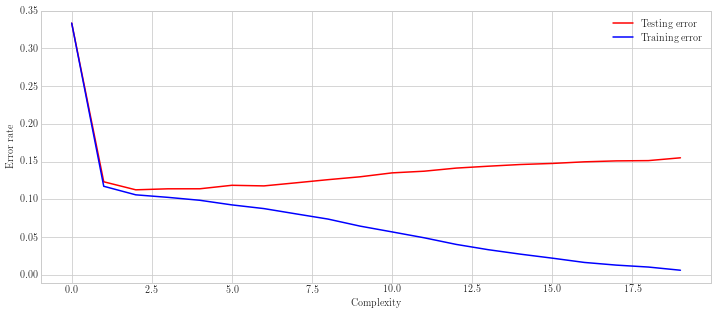

In [19]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn import metrics
from sklearn import tree

MAXC=20
N=1000
NTEST=4000
ITERS=3

yhat_test=np.zeros((ITERS,MAXC,2))
yhat_train=np.zeros((ITERS,MAXC,2))
#Repeat ten times to get smooth curves
for i in range(ITERS):
    X = np.concatenate([1.25*np.random.randn(N,2),5+1.5*np.random.randn(N,2)]) 
    X = np.concatenate([X,[8,5]+1.5*np.random.randn(N,2)])
    y = np.concatenate([np.ones((N,1)),-np.ones((N,1))])
    y = np.concatenate([y,np.ones((N,1))])
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    X_test = np.concatenate([1.25*np.random.randn(NTEST,2),5+1.5*np.random.randn(NTEST,2)]) 
    X_test = np.concatenate([X_test,[8,5]+1.5*np.random.randn(NTEST,2)])
    y_test = np.concatenate([np.ones((NTEST,1)),-np.ones((NTEST,1))])
    y_test = np.concatenate([y_test,np.ones((NTEST,1))])

    j=0
    for C in range(1,MAXC+1):
        #Evaluate the model
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(X,y.ravel())
        yhat_test[i,j,0] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test.ravel())
        yhat_train[i,j,0] = 1. - metrics.accuracy_score(clf.predict(X), y.ravel())
        j=j+1

p1, = plt.plot(np.mean(yhat_test[:,:,0].T,axis=1),'r')
p2, = plt.plot(np.mean(yhat_train[:,:,0].T,axis=1),'b')
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.xlabel('Complexity')
plt.ylabel('Error rate')
plt.legend([p1, p2], ["Testing error", "Training error"])
plt.savefig("learning_curve_4.png",dpi=300, bbox_inches='tight')

Podemos usar todos estos conceptos para comprender y seleccionar la complejidad de un modelo.

Mean accuracy: [0.82536232 0.8263285  0.83188406 0.83429952 0.83550725 0.83333333
 0.82801932 0.82246377 0.82270531 0.81980676 0.81400966 0.81135266
 0.80555556 0.79661836 0.79951691 0.78816425 0.78478261 0.78188406]
Selected model index: 4
Complexity: 6


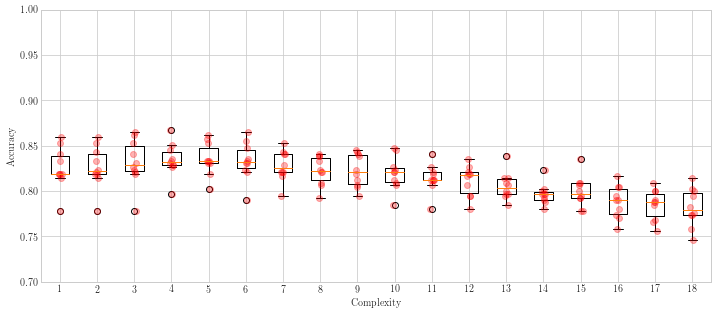

In [20]:
%reset -f
%matplotlib inline
import pickle
ofname = open('dataset_small.pkl','rb') 
(x,y) = pickle.load(ofname, encoding='latin1')
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn import cross_validation

#

#Create a 10-fold cross validation set
kf=cross_validation.KFold(n=y.shape[0], n_folds=10, shuffle=True, random_state=0)
      
#Search the parameter among the following
C=np.arange(2,20,)

acc = np.zeros((10,18))
i=0
for train_index, val_index in kf:
    X_train, X_val = x[train_index], x[val_index]
    y_train, y_val = y[train_index], y[val_index]
    j=0
    for c in C:
        dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=c)
        dt.fit(X_train,y_train)
        yhat = dt.predict(X_val)
        acc[i][j] = metrics.accuracy_score(yhat, y_val)
        j=j+1
    i=i+1
    
plt.boxplot(acc);
for i in range(18):
    xderiv = (i+1)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc[:,i],'ro',alpha=0.3)

print('Mean accuracy: ' + str(np.mean(acc,axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(acc,axis = 0))))
print('Complexity: ' + str(C[np.argmax(np.mean(acc,axis = 0))]))
plt.ylim((0.7,1.))
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.savefig("model_selection.png",dpi=300, bbox_inches='tight')

Mean accuracy: [0.8254832  0.83031158 0.83091854 0.83423816 0.83363939 0.83303607
 0.82790012 0.82397354 0.81974029 0.81732974 0.8061524  0.80102373
 0.7977032  0.79256361 0.79226786 0.78351017 0.78139628 0.7813981 ]
Selected model index: 3
Complexity: 5
Test accuracy: 0.8272946859903382


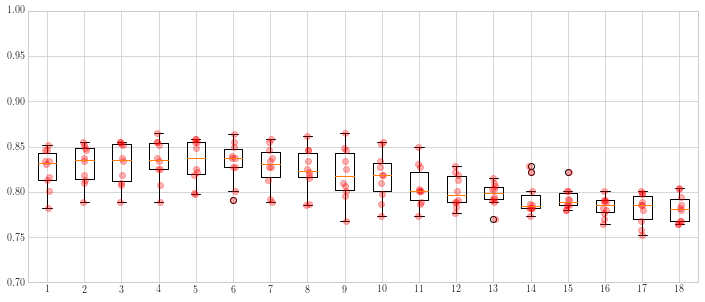

In [ ]:
%reset -f
%matplotlib inline
import pickle
ofname = open('dataset_small.pkl','rb') 
(x,y) = pickle.load(ofname, encoding='latin1')
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn import cross_validation

#Train_test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.20, random_state=42)

#Create a 10-fold cross validation set
kf=cross_validation.KFold(n=y_train.shape[0], n_folds=10, shuffle=True, random_state=0)     
#Search the parameter among the following
C=np.arange(2,20,)
acc = np.zeros((10,18))
i=0
for train_index, val_index in kf:
    X_t, X_val = X_train[train_index], X_train[val_index]
    y_t, y_val = y_train[train_index], y_train[val_index]
    j=0
    for c in C:
        dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=c)
        dt.fit(X_t,y_t)
        yhat = dt.predict(X_val)
        acc[i][j] = metrics.accuracy_score(yhat, y_val)
        j=j+1
    i=i+1

print('Mean accuracy: ' + str(np.mean(acc,axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(acc,axis = 0))))
print('Complexity: ' + str(C[np.argmax(np.mean(acc,axis = 0))]))


#Train the model with the complete training set with the selected complexity
dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C[np.argmax(np.mean(acc,axis = 0))])
dt.fit(X_train,y_train)
#Test the model with the test set 
yhat = dt.predict(X_test)
print('Test accuracy: ' + str(metrics.accuracy_score(yhat, y_test)))

#Train the model for handling to the client
dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C[np.argmax(np.mean(acc,axis = 0))])
dt.fit(x,y)

plt.boxplot(acc);
for i in range(18):
    xderiv = (i+1)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc[:,i],'ro',alpha=0.3)


plt.ylim((0.7,1.))
fig = plt.gcf()
fig.set_size_inches(12,5)

ADVERTENCIA: la siguiente celda tarda mucho tiempo en ejecutarse.

In [ ]:
%reset -f

import pickle
ofname = open('dataset_small.pkl','rb') 
(x,y) = pickle.load(ofname, encoding='latin1')

import numpy as np
from sklearn import grid_search
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import metrics

parameters = {'C':[1e4,1e5,1e6],'gamma':[1e-5,1e-4,1e-3]}

N_folds = 5

kf=cross_validation.KFold(n=y.shape[0], n_folds=N_folds,  shuffle=True, random_state=0)

acc = np.zeros((N_folds,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf:
    X_train, X_test = x[train_index,:], x[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    clf = svm.SVC(kernel='rbf')
    clf = grid_search.GridSearchCV(clf, parameters, cv = 3) #This line does a cross-validation on the 
    clf.fit(X_train,y_train.ravel())
    X_test = scaler.transform(X_test)
    yhat[test_index] = clf.predict(X_test)
    
print(metrics.accuracy_score(yhat, y))
print(metrics.confusion_matrix(yhat, y))

C:\Users\fhbapto\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
